### loading libraries

In [1]:
library(dplyr)
library(doBy)
library(lubridate)
library(ggplot2)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘doBy’


The following object is masked from ‘package:dplyr’:

    order_by



Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




### Initial Setup
Identifying the working directory, which is the github root folder. Everything else will be referenced from that.

In [3]:
workd<-"/Users/jhosen/Library/CloudStorage/GoogleDrive-jakehosen@gmail.com/My Drive/WaterBear/CH4DHT22/20221018_mudBucket/data"
single_dirs<-list.files(path=paste(workd,sep=""),include.dirs=TRUE)


### For loop that cycles through all the single thermistor tests, compiles the records, and removes the debug lines.

In [4]:
single_dirs

[1] "meso1" "meso2"

## Concatenating all the data in the folders

In [20]:
comp_data<-data.frame()

for(i in 2:2){
#i<-1
    curdir<-paste(workd,"/",single_dirs[i],sep="")
    wb_files<-list.files(path=paste(curdir))
    wb_files<-wb_files[wb_files!="notes.txt"]
    for(j in 1:length(wb_files)){
#j<-1
#        print(wb_files[j])
        data<-read.csv(paste(curdir,"/",wb_files[j],sep=""))
        data2<-subset(data,uuid!="debug" & type=="raw")
#        data2$UserNote<-as.character(data2$UserNote)
        if(nrow(data2)>0){
        comp_data<-bind_rows(comp_data,data2)
        }
    }
}


## Adding time formats

In [21]:
comp_data$time_epoch<-as.character(comp_data$time.s)
comp_data$dtp<-lubridate::as_datetime(comp_data$time.s)


## Parses through the data and assigns a burst number and then counts each measurement in a burst.

In [23]:
comp_data$interval<-comp_data$dtp-lag(comp_data$dtp,1)

group<-1
burstcount<-1
comp_data$group<-1
comp_data$burstcount<-1
comp_rows<-nrow(comp_data)
for(i in 1:comp_rows){
    if(!is.na(comp_data$interval[i])){
    if(comp_data$interval[i]>30){
        group<-group+1
        burstcount<-1
        comp_data$group[i:comp_rows]<-group
        comp_data$burstcount[i]<-burstcount
        comp_data$burstcount[i]<-burstcount
            }else{
        comp_data$burstcount[i]<-burstcount
        burstcount<-burstcount+1
        }
        }
    }


In [30]:
names(comp_data)

[1] "type"          "site"          "logger"        "deployment"   
 [5] "deployed_at"   "uuid"          "time.s"        "time.h"       
 [9] "battery.V"     "dht_C"         "dht_RH"        "atlas_CO2_ppm"
[13] "ch4rf_raw"     "ch4rf_cal"     "ch4_raw"       "ch4_cal"      
[17] "user_note"     "user_value"    "time_epoch"    "dtp"          
[21] "interval"      "group"         "burstcount"

In [31]:
comp_data_sum<-summaryBy(ch4_raw+ch4rf_raw+dtp~group,comp_data,FUN=c(sd,mean))

## Plotting average values per burst.

,group,ch4_raw.sd,ch4rf_raw.sd,dtp.sd,ch4_raw.mean,ch4rf_raw.mean,dtp.mean,dtp
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
1,1,9.637888,0.9660918,6.090003,468.0,2002.6,1665781226,2022-10-14 21:00:25
2,2,13.898041,1.7638342,6.083349,617.6,2011.0,1665781286,2022-10-14 21:01:25
3,3,8.260347,1.4907120,6.084377,723.7,2027.0,1665781346,2022-10-14 21:02:25
4,4,4.909175,1.7288403,6.083201,788.1,2041.1,1665781406,2022-10-14 21:03:25
5,5,3.011091,0.8432740,6.082358,825.8,2051.6,1665781466,2022-10-14 21:04:25
6,6,1.686548,0.8432740,6.089022,849.8,2059.4,1665781526,2022-10-14 21:05:25


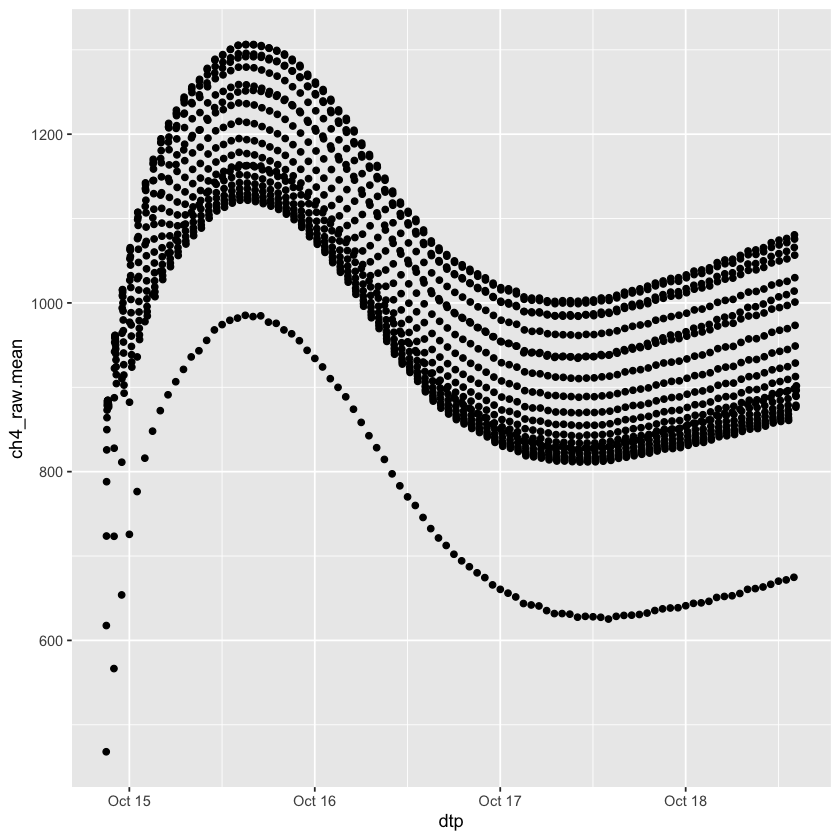

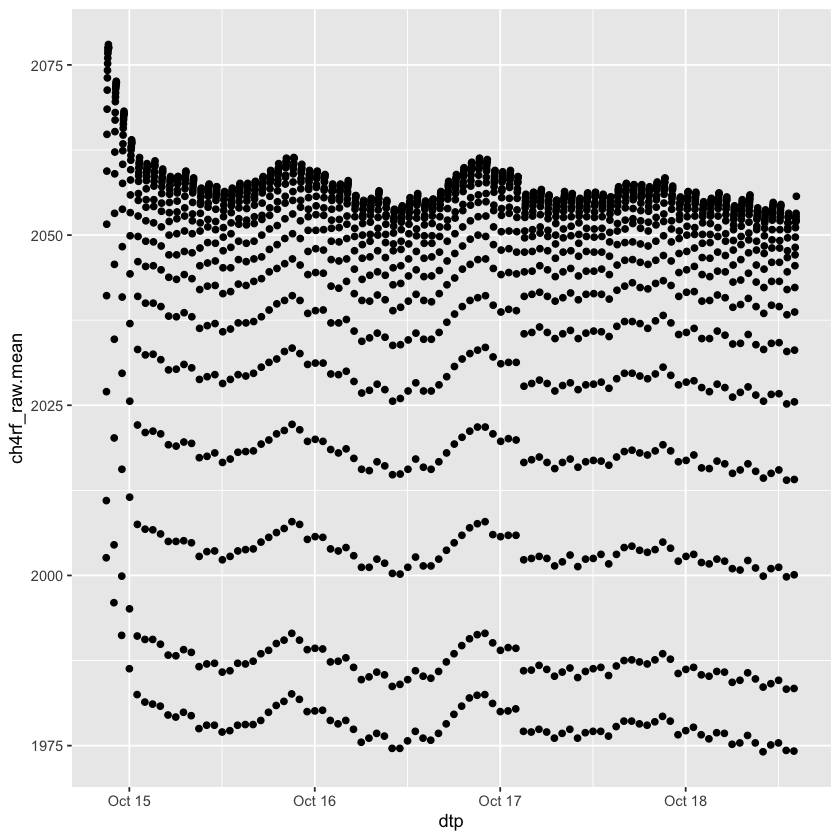

In [32]:
comp_data_sum$dtp<-as_datetime(comp_data_sum$dtp.mean)

head(comp_data_sum)

ggplot(comp_data_sum,aes(dtp,ch4_raw.mean))+
geom_point()


ggplot(comp_data_sum,aes(dtp,ch4rf_raw.mean))+
geom_point()


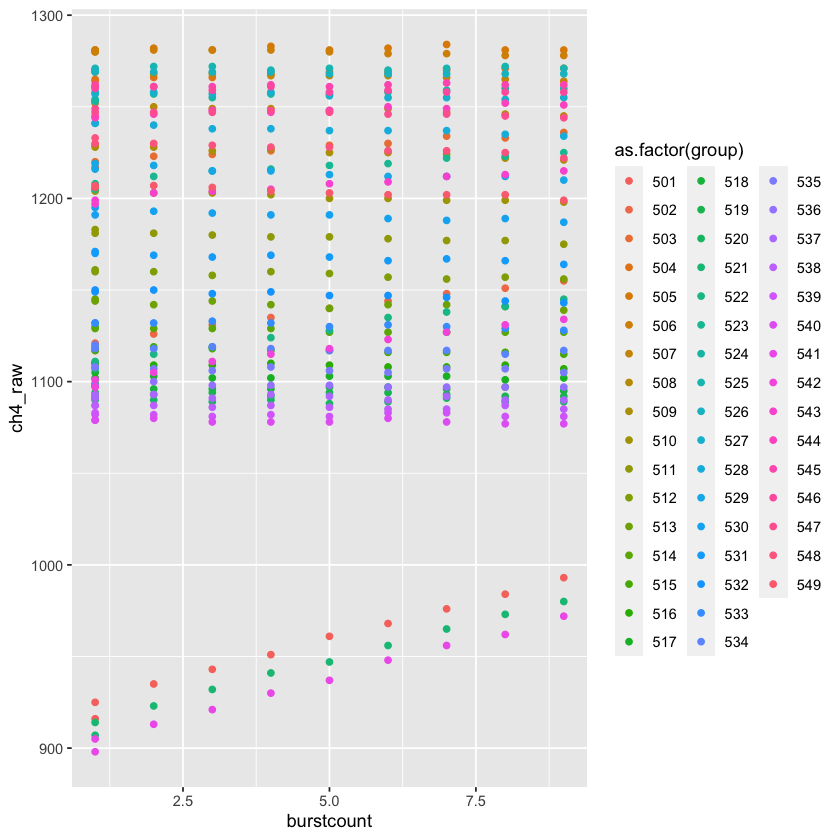

In [38]:
ggplot(subset(comp_data,group>500 & group <550),aes(burstcount,ch4_raw))+
    geom_point(aes(color=as.factor(group)))

In [27]:
names(comp_data)

[1] "type"          "site"          "logger"        "deployment"   
 [5] "deployed_at"   "uuid"          "time.s"        "time.h"       
 [9] "battery.V"     "dht_C"         "dht_RH"        "atlas_CO2_ppm"
[13] "ch4rf_raw"     "ch4rf_cal"     "ch4_raw"       "ch4_cal"      
[17] "user_note"     "user_value"    "time_epoch"    "dtp"          
[21] "interval"      "group"         "burstcount"

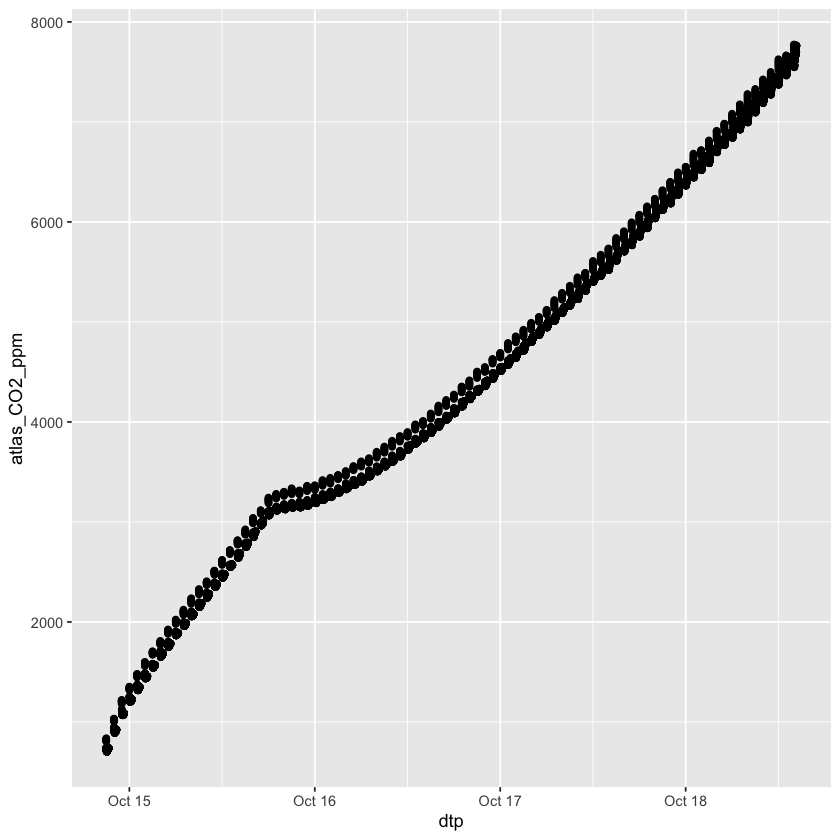

In [29]:
ggplot(comp_data,aes(dtp,atlas_CO2_ppm))+
       geom_point()

In [92]:
head(comp_data,n=100)

,type,site,logger,deployment,deployed_at,uuid,time.s,time.h,battery.V,dht_C,⋯,ch4rf_cal,ch4_raw,ch4_cal,user_note,user_value,time_epoch,dtp,interval,group,burstcount
,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<dbl>,<chr>,<int>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>,<chr>,<dttm>,<drtn>,<dbl>,<dbl>
1,raw,meso1,21003,mesoPilotTest-50FF6B068678545244122467-1665778141,1665778141,50FF6B068678545244122467,1665781215,2022-10-14 21:00:14.741,1790,22.0,⋯,0,1359,0,NA,NA,1665781214.741,2022-10-14 21:00:14,NA secs,1,1
2,raw,meso1,21003,mesoPilotTest-50FF6B068678545244122467-1665778141,1665778141,50FF6B068678545244122467,1665781217,2022-10-14 21:00:16.740,1646,22.0,⋯,0,1347,0,NA,NA,1665781216.74,2022-10-14 21:00:16,1.999 secs,1,1
3,raw,meso1,21003,mesoPilotTest-50FF6B068678545244122467-1665778141,1665778141,50FF6B068678545244122467,1665781219,2022-10-14 21:00:18.743,1621,22.0,⋯,0,1334,0,NA,NA,1665781218.743,2022-10-14 21:00:18,2.003 secs,1,2
4,raw,meso1,21003,mesoPilotTest-50FF6B068678545244122467-1665778141,1665778141,50FF6B068678545244122467,1665781221,2022-10-14 21:00:20.750,1615,21.7,⋯,0,1326,0,NA,NA,1665781220.75,2022-10-14 21:00:20,2.007 secs,1,3
5,raw,meso1,21003,mesoPilotTest-50FF6B068678545244122467-1665778141,1665778141,50FF6B068678545244122467,1665781223,2022-10-14 21:00:22.749,1630,21.7,⋯,0,1327,0,NA,NA,1665781222.749,2022-10-14 21:00:22,1.999 secs,1,4
6,raw,meso1,21003,mesoPilotTest-50FF6B068678545244122467-1665778141,1665778141,50FF6B068678545244122467,1665781225,2022-10-14 21:00:24.752,1631,21.7,⋯,0,1332,0,NA,NA,1665781224.752,2022-10-14 21:00:24,2.003 secs,1,5
7,raw,meso1,21003,mesoPilotTest-50FF6B068678545244122467-1665778141,1665778141,50FF6B068678545244122467,1665781227,2022-10-14 21:00:26.819,1632,21.7,⋯,0,1344,0,NA,NA,1665781226.819,2022-10-14 21:00:26,2.067 secs,1,6
8,raw,meso1,21003,mesoPilotTest-50FF6B068678545244122467-1665778141,1665778141,50FF6B068678545244122467,1665781229,2022-10-14 21:00:28.818,1627,21.7,⋯,0,1355,0,NA,NA,1665781228.818,2022-10-14 21:00:28,1.999 secs,1,7
9,raw,meso1,21003,mesoPilotTest-50FF6B068678545244122467-1665778141,1665778141,50FF6B068678545244122467,1665781231,2022-10-14 21:00:30.821,1627,21.7,⋯,0,1369,0,NA,NA,1665781230.821,2022-10-14 21:00:30,2.003 secs,1,8


In [81]:
head(comp_data,n=100)

,type,site,logger,deployment,deployed_at,uuid,time.s,time.h,battery.V,dht_C,⋯,ch4rf_raw,ch4rf_cal,ch4_raw,ch4_cal,user_note,user_value,time_epoch,dtp,interval,group
,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<dbl>,<chr>,<int>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>,<chr>,<dttm>,<drtn>,<dbl>
1,raw,meso1,21003,mesoPilotTest-50FF6B068678545244122467-1665778141,1665778141,50FF6B068678545244122467,1665781215,2022-10-14 21:00:14.741,1790,22.00,⋯,2004.0,0,1359.0,0,NA,NA,1665781214.741,2022-10-14 21:00:14,NA secs,1
2,raw,meso1,21003,mesoPilotTest-50FF6B068678545244122467-1665778141,1665778141,50FF6B068678545244122467,1665781217,2022-10-14 21:00:16.740,1646,22.00,⋯,2005.0,0,1347.0,0,NA,NA,1665781216.74,2022-10-14 21:00:16,1.999000e+00 secs,1
3,raw,meso1,21003,mesoPilotTest-50FF6B068678545244122467-1665778141,1665778141,50FF6B068678545244122467,1665781219,2022-10-14 21:00:18.743,1621,22.00,⋯,2005.0,0,1334.0,0,NA,NA,1665781218.743,2022-10-14 21:00:18,2.003000e+00 secs,1
4,raw,meso1,21003,mesoPilotTest-50FF6B068678545244122467-1665778141,1665778141,50FF6B068678545244122467,1665781221,2022-10-14 21:00:20.750,1615,21.70,⋯,2003.0,0,1326.0,0,NA,NA,1665781220.75,2022-10-14 21:00:20,2.007000e+00 secs,1
5,raw,meso1,21003,mesoPilotTest-50FF6B068678545244122467-1665778141,1665778141,50FF6B068678545244122467,1665781223,2022-10-14 21:00:22.749,1630,21.70,⋯,2004.0,0,1327.0,0,NA,NA,1665781222.749,2022-10-14 21:00:22,1.999000e+00 secs,1
6,raw,meso1,21003,mesoPilotTest-50FF6B068678545244122467-1665778141,1665778141,50FF6B068678545244122467,1665781225,2022-10-14 21:00:24.752,1631,21.70,⋯,2005.0,0,1332.0,0,NA,NA,1665781224.752,2022-10-14 21:00:24,2.003000e+00 secs,1
7,raw,meso1,21003,mesoPilotTest-50FF6B068678545244122467-1665778141,1665778141,50FF6B068678545244122467,1665781227,2022-10-14 21:00:26.819,1632,21.70,⋯,2004.0,0,1344.0,0,NA,NA,1665781226.819,2022-10-14 21:00:26,2.067000e+00 secs,1
8,raw,meso1,21003,mesoPilotTest-50FF6B068678545244122467-1665778141,1665778141,50FF6B068678545244122467,1665781229,2022-10-14 21:00:28.818,1627,21.70,⋯,2004.0,0,1355.0,0,NA,NA,1665781228.818,2022-10-14 21:00:28,1.999000e+00 secs,1
9,raw,meso1,21003,mesoPilotTest-50FF6B068678545244122467-1665778141,1665778141,50FF6B068678545244122467,1665781231,2022-10-14 21:00:30.821,1627,21.70,⋯,2004.0,0,1369.0,0,NA,NA,1665781230.821,2022-10-14 21:00:30,2.003000e+00 secs,1
